**Afshin Bayatpour, email: afshin.bayatpour@gmail.com**

##### After scraping the table and formatting it as a DataFrame, add columns with the following information (Percentage of Deaths from Total Cases, Percentage of Recovered Cases from Total Cases, Percentage of Recovered Cases from Total Cases and the Percentage of Population Currently Infected. Plot a bar chart of the 10 countries with the highest percentage of their population currently infected.\

## imports

In [47]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import pycountry_convert as pc


## data exploring

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live Update: 151,159,892 Cases and 3,179,921 Deaths from the Coronavirus - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link hr
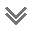

In [48]:
website = 'https://www.worldometers.info/coronavirus/?utm_campaign=homeAdvegas1?'
website_url=requests.get(website).text
soup = BeautifulSoup(website_url)

print(soup.prettify())

In [49]:
my_table = soup.find('tbody')

table_data = []
for row in my_table.findAll('tr'):
    row_data = []
    for cell in row.findAll('td'):
        row_data.append(cell.text)
    if(len(row_data) > 0):
        data_item = {"Country": row_data[1],
                     "Total_Cases": row_data[2],
                     "New_Cases": row_data[3],
                     "Total_Deaths": row_data[4],
                     "New_Deaths": row_data[5],
                     "Total_Recovered": row_data[6],
                     "Active_Cases": row_data[8],
                     "Serious_Critical": row_data[9],
                     "Totcase/1Mpop": row_data[10],
                     "Totdeath/1Mpop": row_data[11],
                     "TotalTests": row_data[12],
                     "Totaltest/1Mpop": row_data[13],
                     "Population": row_data[14],
                    
                    }
        table_data.append(data_item)
#         print(row_data[1])

df = pd.DataFrame(table_data)


In [50]:
# removing first 8 rows:
df.drop(df.index[:8], inplace=True)
df = df.reset_index(drop=True)
df.head()

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Totcase/1Mpop,Totdeath/1Mpop,TotalTests,Totaltest/1Mpop,Population
0,USA,"33,044,068",,"589,207",,"25,641,574","6,813,287","9,751","99,349","1,771","445,132,683","1,338,318","332,606,157"
1,India,"18,762,976","+7,992","208,330",+17,"15,384,418","3,170,228","8,944","13,487",150,"286,392,086","205,860","1,391,197,718"
2,Brazil,"14,592,886",,"401,417",,"13,152,118","1,039,351","8,318","68,253","1,877","43,818,216","204,943","213,807,144"
3,France,"5,592,390",,"104,224",,"4,498,292","989,874","5,804","85,520","1,594","75,604,728","1,156,160","65,392,975"
4,Russia,"4,796,557",,"109,731",,"4,419,540","267,286","2,300","32,856",752,"128,800,000","882,275","145,986,248"


In [51]:
continent = []
missed_contries = []
for country in df.Country:
    try:
    
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        print(country_code)
        continent_name = pc.country_alpha2_to_continent_code(country_code)
        continent.append(continent_name)
        
    except:
        print(country)
        missed_contries.append(country)
        continent.append(np.nan)
df["continent"] = continent

US
IN
BR
FR
RU
TR
UK
IT
ES
DE
AR
CO
PL
IR
MX
UA
PE
ID
CZ
ZA
NL
CA
CL
IQ
RO
PH
BE
SE
IL
PT
PK
HU
BD
JO
RS
CH
AT
JP
LB
UAE
MA
SA
MY
BG
SK
EC
PA
BY
GR
HR
KZ
AZ
NP
GE
TN
BO
PS
PY
KW
DO
ET
DK
MD
CR
IE
LT
SI
EG
GT
AM
HN
QA
BA
VE
UY
OM
LY
BH
NG
KE
MK
MM
AL
S. Korea
DZ
EE
LV
NO
LK
CU
ME
KG
GH
ZM
UZ
FI
CM
MZ
SV
LU
CY
TH
SG
AF
NA
BW
CI
JM
UG
SN
ZW
MG
MN
MW
SD
MT
DRC
AU
MV
AO
RW
CV
GA
SY
GN
RE
YT
GF
PF
SZ
MR
GP
SO
ML
BF
TJ
AD
GY
HT
TG
BZ
KH
CW
HK
MQ
DJ
PG
LS
CG
AW
SS
TT
BS
SR
BJ
GQ
NI
IS
CAR
YE
GM
SC
NE
SM
TD
LC
GI
Channel Islands
SL
BI
BB
KM
GW
ER
LI
VN
NZ
MC
TC
BM
ST
Sint Maarten
TL
Timor-Leste
LR
St. Vincent Grenadines
MF
IM
Caribbean Netherlands
AG
MU
TW
BT
St. Barth
Diamond Princess
LA
Faeroe Islands
KY
TZ
WF
Brunei 
VG
DM
GD
NC
FJ
AI
FK
MO
KN
GL
Vatican City
Saint Pierre Miquelon
MS
SB
EH
Western Sahara
MS Zaandam
VU
MH
WS
Saint Helena
FM
CN


In [52]:
df.describe()

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Totcase/1Mpop,Totdeath/1Mpop,TotalTests,Totaltest/1Mpop,Population,continent
count,222,222,222,222,222,222,222,222,222,222,222,222,222,203
unique,222,220,16,185,13,220,203,111,221,172,211,211,221,6
top,Mauritania,20,,,,2,0,,,,,,,AF
freq,1,2,207,15,210,2,14,74,2,17,12,12,2,54


In [53]:
df.isna().sum()

Country              0
Total_Cases          0
New_Cases            0
Total_Deaths         0
New_Deaths           0
Total_Recovered      0
Active_Cases         0
Serious_Critical     0
Totcase/1Mpop        0
Totdeath/1Mpop       0
TotalTests           0
Totaltest/1Mpop      0
Population           0
continent           19
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           222 non-null    object
 1   Total_Cases       222 non-null    object
 2   New_Cases         222 non-null    object
 3   Total_Deaths      222 non-null    object
 4   New_Deaths        222 non-null    object
 5   Total_Recovered   222 non-null    object
 6   Active_Cases      222 non-null    object
 7   Serious_Critical  222 non-null    object
 8   Totcase/1Mpop     222 non-null    object
 9   Totdeath/1Mpop    222 non-null    object
 10  TotalTests        222 non-null    object
 11  Totaltest/1Mpop   222 non-null    object
 12  Population        222 non-null    object
 13  continent         203 non-null    object
dtypes: object(14)
memory usage: 24.4+ KB


#### Percentage of Deaths from Total Cases

In [55]:
df["Total_Deaths"] = df["Total_Deaths"].apply(lambda x: x.replace(",", ""))
df["Total_Deaths"] = df["Total_Deaths"].apply(lambda x: x.strip())
df['Total_Deaths'].replace('', np.nan, inplace=True)
df['Total_Deaths'].dropna(inplace = True)
df["Total_Deaths"]=df["Total_Deaths"].astype(float)

In [56]:
df["Total_Cases"]=df["Total_Cases"].apply(lambda x: x.replace(",", ""))
df["Total_Cases"]=df["Total_Cases"].apply(lambda x: x.strip())
df['Total_Cases'].replace('', np.nan, inplace=True)
df['Total_Cases'].dropna()
df["Total_Cases"]=df["Total_Cases"].astype(float)

In [57]:
df["Percentage of Deaths/Total Cases"] = (df["Total_Deaths"])*100/(df["Total_Cases"])
df

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Totcase/1Mpop,Totdeath/1Mpop,TotalTests,Totaltest/1Mpop,Population,continent,Percentage of Deaths/Total Cases
0,USA,33044068.0,,589207.0,,"25,641,574","6,813,287","9,751","99,349","1,771","445,132,683","1,338,318","332,606,157",NA,1.783095
1,India,18762976.0,"+7,992",208330.0,+17,"15,384,418","3,170,228","8,944","13,487",150,"286,392,086","205,860","1,391,197,718",AS,1.110325
2,Brazil,14592886.0,,401417.0,,"13,152,118","1,039,351","8,318","68,253","1,877","43,818,216","204,943","213,807,144",SA,2.750772
3,France,5592390.0,,104224.0,,"4,498,292","989,874","5,804","85,520","1,594","75,604,728","1,156,160","65,392,975",EU,1.863675
4,Russia,4796557.0,,109731.0,,"4,419,540","267,286","2,300","32,856",752,"128,800,000","882,275","145,986,248",EU,2.287703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,Marshall Islands,4.0,,NaN,,4,0,,67,,,,"59,520",OC,NaN
218,Samoa,3.0,,NaN,,2,1,,15,,,,"199,503",OC,NaN
219,Saint Helena,2.0,,NaN,,2,0,,328,,,,"6,092",NaN,NaN
220,Micronesia,1.0,,NaN,,1,0,,9,,,,"116,017",OC,NaN


#### Percentage of Recovered Cases from Total Cases

In [58]:
df["Total_Recovered"] = df["Total_Recovered"].apply(lambda x: x.replace(",", ""))
df['Total_Recovered'].replace('N/A', np.nan, inplace=True)
df['Total_Recovered'].dropna(inplace = True)
df["Total_Recovered"]=df["Total_Recovered"].astype(float)

In [59]:
df["Percentage of Recovered Cases/Total Cases"] = (df["Total_Recovered"])*100/(df["Total_Cases"])
df

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Totcase/1Mpop,Totdeath/1Mpop,TotalTests,Totaltest/1Mpop,Population,continent,Percentage of Deaths/Total Cases,Percentage of Recovered Cases/Total Cases
0,USA,33044068.0,,589207.0,,25641574.0,"6,813,287","9,751","99,349","1,771","445,132,683","1,338,318","332,606,157",NA,1.783095,77.598115
1,India,18762976.0,"+7,992",208330.0,+17,15384418.0,"3,170,228","8,944","13,487",150,"286,392,086","205,860","1,391,197,718",AS,1.110325,81.993485
2,Brazil,14592886.0,,401417.0,,13152118.0,"1,039,351","8,318","68,253","1,877","43,818,216","204,943","213,807,144",SA,2.750772,90.126915
3,France,5592390.0,,104224.0,,4498292.0,"989,874","5,804","85,520","1,594","75,604,728","1,156,160","65,392,975",EU,1.863675,80.435950
4,Russia,4796557.0,,109731.0,,4419540.0,"267,286","2,300","32,856",752,"128,800,000","882,275","145,986,248",EU,2.287703,92.139841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,Marshall Islands,4.0,,NaN,,4.0,0,,67,,,,"59,520",OC,NaN,100.000000
218,Samoa,3.0,,NaN,,2.0,1,,15,,,,"199,503",OC,NaN,66.666667
219,Saint Helena,2.0,,NaN,,2.0,0,,328,,,,"6,092",NaN,NaN,100.000000
220,Micronesia,1.0,,NaN,,1.0,0,,9,,,,"116,017",OC,NaN,100.000000


#### Percentage of Population Currently Infected

In [60]:
df["Active_Cases"] = df["Active_Cases"].apply(lambda x: x.replace(",", ""))
df['Active_Cases'].replace('N/A', np.nan, inplace=True)
df['Active_Cases'].dropna(inplace = True)
df["Active_Cases"]=df["Active_Cases"].astype(float)

In [61]:
df["Population"] = df["Population"].apply(lambda x: x.replace(",", ""))
df["Population"] = df["Population"].apply(lambda x: x.strip())

df['Population'].replace("", np.nan, inplace=True)
df['Population'].dropna(inplace = True)
df["Population"]=df["Population"].astype(float)

In [62]:
df["Percentage of Population Currently Infected/Total Cases"] = (df["Active_Cases"])*100/(df["Population"])
df

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Totcase/1Mpop,Totdeath/1Mpop,TotalTests,Totaltest/1Mpop,Population,continent,Percentage of Deaths/Total Cases,Percentage of Recovered Cases/Total Cases,Percentage of Population Currently Infected/Total Cases
0,USA,33044068.0,,589207.0,,25641574.0,6813287.0,"9,751","99,349","1,771","445,132,683","1,338,318",3.326062e+08,NA,1.783095,77.598115,2.048455
1,India,18762976.0,"+7,992",208330.0,+17,15384418.0,3170228.0,"8,944","13,487",150,"286,392,086","205,860",1.391198e+09,AS,1.110325,81.993485,0.227878
2,Brazil,14592886.0,,401417.0,,13152118.0,1039351.0,"8,318","68,253","1,877","43,818,216","204,943",2.138071e+08,SA,2.750772,90.126915,0.486116
3,France,5592390.0,,104224.0,,4498292.0,989874.0,"5,804","85,520","1,594","75,604,728","1,156,160",6.539298e+07,EU,1.863675,80.435950,1.513731
4,Russia,4796557.0,,109731.0,,4419540.0,267286.0,"2,300","32,856",752,"128,800,000","882,275",1.459862e+08,EU,2.287703,92.139841,0.183090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,Marshall Islands,4.0,,NaN,,4.0,0.0,,67,,,,5.952000e+04,OC,NaN,100.000000,0.000000
218,Samoa,3.0,,NaN,,2.0,1.0,,15,,,,1.995030e+05,OC,NaN,66.666667,0.000501
219,Saint Helena,2.0,,NaN,,2.0,0.0,,328,,,,6.092000e+03,NaN,NaN,100.000000,0.000000
220,Micronesia,1.0,,NaN,,1.0,0.0,,9,,,,1.160170e+05,OC,NaN,100.000000,0.000000


In [63]:
df_sorted = df.sort_values('Percentage of Population Currently Infected/Total Cases',ascending=False)
Highly_infected_countries = df_sorted.head(10)

#### Plot a bar chart of the 10 countries with the highest percentage of their population currently infected

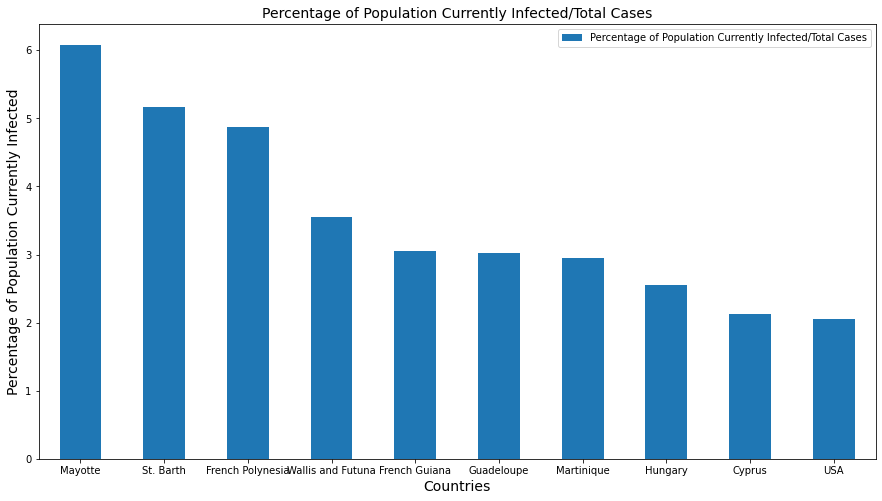

In [64]:
Highly_infected_countries.plot(x='Country', y='Percentage of Population Currently Infected/Total Cases', kind='bar',figsize=(15,8)) 
plt.xticks(rotation=0)
plt.xlabel('Countries',fontdict={'fontsize':14})
plt.ylabel('Percentage of Population Currently Infected',fontdict={'fontsize':14})
plt.title('Percentage of Population Currently Infected/Total Cases',fontdict={'fontsize':14})
plt.show()

## data preprocessing


In [65]:
df.head()

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Totcase/1Mpop,Totdeath/1Mpop,TotalTests,Totaltest/1Mpop,Population,continent,Percentage of Deaths/Total Cases,Percentage of Recovered Cases/Total Cases,Percentage of Population Currently Infected/Total Cases
0,USA,33044068.0,,589207.0,,25641574.0,6813287.0,"9,751","99,349","1,771","445,132,683","1,338,318",3.326062e+08,NA,1.783095,77.598115,2.048455
1,India,18762976.0,"+7,992",208330.0,+17,15384418.0,3170228.0,"8,944","13,487",150,"286,392,086","205,860",1.391198e+09,AS,1.110325,81.993485,0.227878
2,Brazil,14592886.0,,401417.0,,13152118.0,1039351.0,"8,318","68,253","1,877","43,818,216","204,943",2.138071e+08,SA,2.750772,90.126915,0.486116
3,France,5592390.0,,104224.0,,4498292.0,989874.0,"5,804","85,520","1,594","75,604,728","1,156,160",6.539298e+07,EU,1.863675,80.435950,1.513731
4,Russia,4796557.0,,109731.0,,4419540.0,267286.0,"2,300","32,856",752,"128,800,000","882,275",1.459862e+08,EU,2.287703,92.139841,0.183090


In [66]:
df.dropna(subset = ["continent","Total_Cases", "Total_Deaths", "Total_Recovered"], inplace=True)

In [67]:
df.shape

(191, 17)

In [68]:
df.groupby("continent").count()

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Totcase/1Mpop,Totdeath/1Mpop,TotalTests,Totaltest/1Mpop,Population,Percentage of Deaths/Total Cases,Percentage of Recovered Cases/Total Cases,Percentage of Population Currently Infected/Total Cases
continent,,,,,,,,,,,,,,,,
AF,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
AS,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
EU,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
NA,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
OC,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
SA,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [69]:
le = LabelEncoder()
for label in df[["continent"]]:
    df[label] = le.fit_transform(df[label])  
df.head()

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Totcase/1Mpop,Totdeath/1Mpop,TotalTests,Totaltest/1Mpop,Population,continent,Percentage of Deaths/Total Cases,Percentage of Recovered Cases/Total Cases,Percentage of Population Currently Infected/Total Cases
0,USA,33044068.0,,589207.0,,25641574.0,6813287.0,"9,751","99,349","1,771","445,132,683","1,338,318",3.326062e+08,3,1.783095,77.598115,2.048455
1,India,18762976.0,"+7,992",208330.0,+17,15384418.0,3170228.0,"8,944","13,487",150,"286,392,086","205,860",1.391198e+09,1,1.110325,81.993485,0.227878
2,Brazil,14592886.0,,401417.0,,13152118.0,1039351.0,"8,318","68,253","1,877","43,818,216","204,943",2.138071e+08,5,2.750772,90.126915,0.486116
3,France,5592390.0,,104224.0,,4498292.0,989874.0,"5,804","85,520","1,594","75,604,728","1,156,160",6.539298e+07,2,1.863675,80.435950,1.513731
4,Russia,4796557.0,,109731.0,,4419540.0,267286.0,"2,300","32,856",752,"128,800,000","882,275",1.459862e+08,2,2.287703,92.139841,0.183090


In [70]:
X = df[["Total_Cases", "Total_Deaths", "Total_Recovered"]]
y = df[["continent"]]


In [71]:
from sklearn.preprocessing import StandardScaler
def preprocessing(X,y):
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    #transfering in dataframe format
    scaled_data = pd.DataFrame(X_train_scaled)
    X_train_scaled = scaled_data.rename(columns={0: 'Total_Cases', 1: "Total_Deaths", 2: "Total_Recovered"})

    scaled_data = pd.DataFrame(X_test_scaled)
    X_test_scaled = scaled_data.rename(columns={0: 'Total_Cases', 1: "Total_Deaths", 2: "Total_Recovered"})
    
    return X_train_scaled, X_test_scaled, y_train, y_test


In [72]:
X_train,X_test,y_train,y_test = preprocessing(X,y)

In [73]:
def fit_model(model,X,y):
    model.fit(X,y)
    y_pred = model.predict(X_test)
    print("Accuracy: ",model.score(X_test,y_test))
    print("------------------------------")
    print("Classification Report")
    print("------------------------------")
    print(classification_report(y_test,y_pred))
    print("------------------------------")
    print("Confusion Matrix")
    print("------------------------------")
    print(confusion_matrix(y_test,y_pred))
    print("------------------------------")
    return y_pred

In [74]:
lr = LogisticRegression(max_iter = 1000)
y_test_lr = fit_model(lr,X_train,y_train)

Accuracy:  0.28205128205128205
------------------------------
Classification Report
------------------------------
              precision    recall  f1-score   support

           0       0.31      0.90      0.46        10
           1       0.00      0.00      0.00         5
           2       0.50      0.13      0.21        15
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2

    accuracy                           0.28        39
   macro avg       0.14      0.17      0.11        39
weighted avg       0.27      0.28      0.20        39

------------------------------
Confusion Matrix
------------------------------
[[9 0 1 0 0 0]
 [4 0 1 0 0 0]
 [7 5 2 1 0 0]
 [6 0 0 0 0 0]
 [1 0 0 0 0 0]
 [2 0 0 0 0 0]]
------------------------------


C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

In [75]:
dtree = DecisionTreeClassifier()

y_test_dtree = fit_model(dtree,X_train,y_train)

Accuracy:  0.38461538461538464
------------------------------
Classification Report
------------------------------
              precision    recall  f1-score   support

           0       0.44      0.70      0.54        10
           1       0.25      0.60      0.35         5
           2       0.67      0.27      0.38        15
           3       0.33      0.17      0.22         6
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2

    accuracy                           0.38        39
   macro avg       0.28      0.29      0.25        39
weighted avg       0.45      0.38      0.36        39

------------------------------
Confusion Matrix
------------------------------
[[7 1 2 0 0 0]
 [1 3 0 0 0 1]
 [3 5 4 2 0 1]
 [4 1 0 1 0 0]
 [1 0 0 0 0 0]
 [0 2 0 0 0 0]]
------------------------------


C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
knn = KNeighborsClassifier(n_neighbors=5) 

fit_model(knn,X_train,y_train)

C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWa

Accuracy:  0.3333333333333333
------------------------------
Classification Report
------------------------------
              precision    recall  f1-score   support

           0       0.37      0.70      0.48        10
           1       0.18      0.40      0.25         5
           2       0.50      0.13      0.21        15
           3       0.40      0.33      0.36         6
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2

    accuracy                           0.33        39
   macro avg       0.24      0.26      0.22        39
weighted avg       0.37      0.33      0.29        39

------------------------------
Confusion Matrix
------------------------------
[[7 2 0 1 0 0]
 [1 2 1 1 0 0]
 [6 6 2 1 0 0]
 [3 0 1 2 0 0]
 [1 0 0 0 0 0]
 [1 1 0 0 0 0]]
------------------------------


array([1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 1, 0, 2, 0, 3,
       0, 1, 1, 2, 1, 3, 0, 1, 3, 0, 1, 0, 0, 3, 0, 1, 1])

In [77]:
s = pd.value_counts(y.continent)
s1 = pd.Series({'nunique': len(s), 'unique values': s.index.tolist()})
s.append(s1)

0                                54
2                                44
1                                43
3                                30
5                                13
4                                 7
nunique                           6
unique values    [0, 2, 1, 3, 5, 4]
dtype: object

## applying over sampling


In [78]:
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X, y)

In [79]:
s = pd.value_counts(y_over.continent)
s1 = pd.Series({'nunique': len(s), 'unique values': s.index.tolist()})
s.append(s1)

5                                54
4                                54
3                                54
2                                54
1                                54
0                                54
nunique                           6
unique values    [5, 4, 3, 2, 1, 0]
dtype: object

In [80]:
X_train,X_test,y_train,y_test = preprocessing(X_over, y_over)

In [81]:
lr = LogisticRegression(max_iter = 1000)
fit_model(lr,X_train,y_train)

Accuracy:  0.16923076923076924
------------------------------
Classification Report
------------------------------
              precision    recall  f1-score   support

           0       0.11      0.83      0.20         6
           1       0.25      0.08      0.12        12
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        13
           5       0.42      0.62      0.50         8

    accuracy                           0.17        65
   macro avg       0.13      0.26      0.14        65
weighted avg       0.11      0.17      0.10        65

------------------------------
Confusion Matrix
------------------------------
[[ 5  0  0  0  0  1]
 [ 9  1  0  1  0  1]
 [ 7  3  0  3  0  4]
 [ 8  0  0  0  0  1]
 [13  0  0  0  0  0]
 [ 3  0  0  0  0  5]]
------------------------------


C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

array([0, 0, 5, 0, 5, 0, 0, 0, 5, 0, 5, 0, 0, 0, 5, 0, 0, 1, 0, 0, 5, 0,
       0, 0, 0, 1, 5, 3, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 5, 3, 0, 0, 5])

(array([249.,   6.,   0.,   1.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.25450907,  1.01113103,  2.27677113,  3.54241124,  4.80805134,
         6.07369144,  7.33933154,  8.60497165,  9.87061175, 11.13625185,
        12.40189195]),
 <a list of 10 Patch objects>)

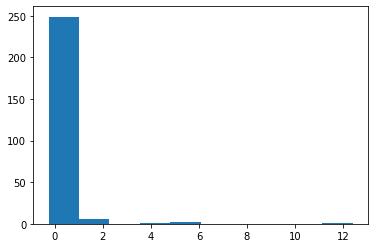

In [82]:
plt.hist(X_train["Total_Cases"])

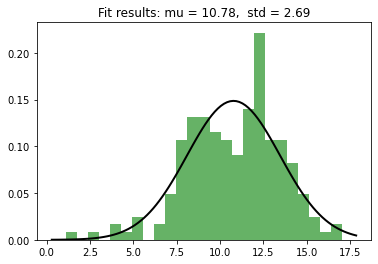

In [83]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Generate some data for this demonstration.
data = np.log(X["Total_Recovered"])
#data = X1["Total_Deaths"]

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [84]:
X = np.log(X)

In [85]:
X_over, y_over = oversample.fit_resample(X, y)

In [86]:
X_train,X_test,y_train,y_test = preprocessing(X_over, y_over)

In [87]:
lr = LogisticRegression(max_iter = 1000)
fit_model(lr,X_train,y_train)

Accuracy:  0.2
------------------------------
Classification Report
------------------------------
              precision    recall  f1-score   support

           0       0.08      0.17      0.11         6
           1       0.20      0.17      0.18        12
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00         9
           4       0.54      0.54      0.54        13
           5       0.12      0.38      0.19         8

    accuracy                           0.20        65
   macro avg       0.16      0.21      0.17        65
weighted avg       0.17      0.20      0.17        65

------------------------------
Confusion Matrix
------------------------------
[[ 1  2  0  1  1  1]
 [ 4  2  0  1  2  3]
 [ 1  2  0  0  1 13]
 [ 2  1  0  0  2  4]
 [ 3  0  0  3  7  0]
 [ 2  3  0  0  0  3]]
------------------------------


C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

array([4, 3, 5, 3, 5, 0, 5, 3, 5, 3, 0, 4, 0, 1, 5, 5, 0, 1, 0, 3, 5, 1,
       4, 5, 4, 5, 5, 5, 4, 5, 0, 5, 5, 5, 4, 0, 0, 4, 4, 5, 1, 1, 4, 0,
       5, 5, 4, 5, 4, 0, 0, 1, 1, 5, 5, 5, 4, 4, 0, 5, 1, 5, 1, 0, 1])

In [88]:
dtree = DecisionTreeClassifier(max_depth=10)

y_test_dtree = fit_model(dtree,X_train,y_train)

Accuracy:  0.3384615384615385
------------------------------
Classification Report
------------------------------
              precision    recall  f1-score   support

           0       0.22      0.33      0.27         6
           1       0.17      0.08      0.11        12
           2       0.38      0.18      0.24        17
           3       0.19      0.33      0.24         9
           4       0.67      0.62      0.64        13
           5       0.36      0.62      0.45         8

    accuracy                           0.34        65
   macro avg       0.33      0.36      0.33        65
weighted avg       0.35      0.34      0.33        65

------------------------------
Confusion Matrix
------------------------------
[[2 1 0 3 0 0]
 [3 1 1 3 2 2]
 [2 3 3 3 1 5]
 [1 0 2 3 1 2]
 [1 1 0 3 8 0]
 [0 0 2 1 0 5]]
------------------------------


In [89]:
knn = KNeighborsClassifier(n_neighbors=1) 

fit_model(knn,X_train,y_train)

Accuracy:  0.4153846153846154
------------------------------
Classification Report
------------------------------
              precision    recall  f1-score   support

           0       0.25      0.33      0.29         6
           1       0.50      0.33      0.40        12
           2       0.25      0.12      0.16        17
           3       0.27      0.33      0.30         9
           4       0.91      0.77      0.83        13
           5       0.32      0.75      0.44         8

    accuracy                           0.42        65
   macro avg       0.42      0.44      0.40        65
weighted avg       0.44      0.42      0.40        65

------------------------------
Confusion Matrix
------------------------------
[[ 2  0  1  2  0  1]
 [ 2  4  1  2  1  2]
 [ 1  3  2  3  0  8]
 [ 1  0  3  3  0  2]
 [ 2  1  0  0 10  0]
 [ 0  0  1  1  0  6]]
------------------------------


C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([3, 0, 3, 4, 5, 3, 1, 4, 2, 4, 5, 4, 3, 5, 5, 5, 5, 1, 3, 4, 5, 1,
       1, 3, 4, 5, 5, 5, 4, 2, 0, 2, 5, 5, 0, 1, 3, 4, 4, 2, 1, 1, 3, 5,
       5, 1, 3, 5, 3, 0, 0, 0, 2, 5, 2, 3, 4, 4, 0, 5, 2, 5, 0, 2, 5])

### Grid search

In [90]:
model = LogisticRegression(max_iter = 1000)
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result_lr_grid = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result_lr_grid.best_score_)
print('Best Hyperparameters: %s' % result_lr_grid.best_params_)

Best Score: 0.4518399714871246
Best Hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.45179542 0.45179542        nan        nan        nan 0.18533369
 0.18533369 0.18533369 0.30499866        nan        nan        nan
 0.45179542 0.45179542        nan        nan        nan 0.18533369
 0.18533369 0.18533369 0.30499866        nan        nan        nan
 0.45179542 0.45179542        nan        nan        nan 0.18533369
 0.30883008 0.30883008 0.30887463        nan        nan        nan
 0.45179542 0.45179542        nan        nan        nan 0.18533369
 0.37066738 0.37066738 0.30504321        nan        nan        nan
 0.45179542 0.45179542        nan        nan        nan 0.34001604
 0.3940123  0.3940123  0.35529716        nan        nan        nan
 0.45179542 0.45179542        nan        nan        nan 0.39383409
 0.40929342 0.40929342 0.39378954        nan        nan        nan
 0.45179542 0.45179542        nan        nan        

In [91]:
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
# define search space
space = dict()
space['n_neighbors'] = [1, 3, 5, 7, 9, 11,13,15,30,45]
space['leaf_size'] = list(range(1,20))
space['p'] = [1,2]
# define search
knn = KNeighborsClassifier()
search = GridSearchCV(knn, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result_knn_grid = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result_knn_grid.best_score_)
print('Best Hyperparameters: %s' % result_knn_grid.best_params_)

Best Score: 0.4595473581038938
Best Hyperparameters: {'leaf_size': 1, 'n_neighbors': 1, 'p': 2}


C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [92]:
knn = KNeighborsClassifier(n_neighbors=1, leaf_size = 1, p = 2) 

fit_model(knn,X_train,y_train)

Accuracy:  0.4153846153846154
------------------------------
Classification Report
------------------------------
              precision    recall  f1-score   support

           0       0.25      0.33      0.29         6
           1       0.50      0.33      0.40        12
           2       0.25      0.12      0.16        17
           3       0.27      0.33      0.30         9
           4       0.91      0.77      0.83        13
           5       0.32      0.75      0.44         8

    accuracy                           0.42        65
   macro avg       0.42      0.44      0.40        65
weighted avg       0.44      0.42      0.40        65

------------------------------
Confusion Matrix
------------------------------
[[ 2  0  1  2  0  1]
 [ 2  4  1  2  1  2]
 [ 1  3  2  3  0  8]
 [ 1  0  3  3  0  2]
 [ 2  1  0  0 10  0]
 [ 0  0  1  1  0  6]]
------------------------------


C:\Users\AfshIn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([3, 0, 3, 4, 5, 3, 1, 4, 2, 4, 5, 4, 3, 5, 5, 5, 5, 1, 3, 4, 5, 1,
       1, 3, 4, 5, 5, 5, 4, 2, 0, 2, 5, 5, 0, 1, 3, 4, 4, 2, 1, 1, 3, 5,
       5, 1, 3, 5, 3, 0, 0, 0, 2, 5, 2, 3, 4, 4, 0, 5, 2, 5, 0, 2, 5])